## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

Read the .csv file and store it in a Pandas DataFrame called df. Have a look at the read_csv() documentation and try to provide these column names: ['DATE', 'TAG', 'POSTS']

Look at the first and last 5 rows of the DataFrame.

How many rows and how many columns does it have?

Count the number of entries in each column.

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [90]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [91]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [92]:
df.tail()

,DATE,TAG,POSTS
2812,2025-06-01 00:00:00,php,207
2813,2025-06-01 00:00:00,python,1233
2814,2025-06-01 00:00:00,r,294
2815,2025-06-01 00:00:00,ruby,29
2816,2025-06-01 00:00:00,swift,153


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [93]:
df.shape

(2817, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [94]:
df.count()

DATE     2817
TAG      2817
POSTS    2817
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [95]:
df.groupby('TAG').sum().sort_values('POSTS', ascending=False)[['POSTS']]

,POSTS
TAG,
javascript,2529405
python,2210513
java,1919194
c#,1624424
php,1466476
c++,814530
r,510888
c,407951
swift,336294


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [96]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,203,203
c,203,203
c#,204,204
c++,203,203
delphi,203,203
go,188,188
java,203,203
javascript,203,203
perl,203,203


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [97]:
df.DATE = pd.to_datetime(df.DATE)
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164
...,...,...,...
2812,2025-06-01,php,207
2813,2025-06-01,python,1233
2814,2025-06-01,r,294
2815,2025-06-01,ruby,29


## Data Manipulation



In [98]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1638.0,752.0,104.0,NaN,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1983.0,804.0,112.0,NaN,1143.0,720.0,128.0,602.0,504.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,951.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,60.0,272.0,977.0,575.0,58.0,96.0,912.0,1124.0,15.0,344.0,2157.0,499.0,50.0,302.0
2025-03-01,59.0,307.0,914.0,679.0,53.0,97.0,884.0,1119.0,16.0,331.0,2209.0,483.0,46.0,295.0
2025-04-01,49.0,204.0,646.0,515.0,37.0,64.0,786.0,783.0,15.0,251.0,1712.0,400.0,31.0,215.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [99]:
reshaped_df.shape

(204, 14)

In [100]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [101]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1638.0,752.0,104.0,NaN,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1983.0,804.0,112.0,NaN,1143.0,720.0,128.0,602.0,504.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,951.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


In [102]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2025-02-01,60.0,272.0,977.0,575.0,58.0,96.0,912.0,1124.0,15.0,344.0,2157.0,499.0,50.0,302.0
2025-03-01,59.0,307.0,914.0,679.0,53.0,97.0,884.0,1119.0,16.0,331.0,2209.0,483.0,46.0,295.0
2025-04-01,49.0,204.0,646.0,515.0,37.0,64.0,786.0,783.0,15.0,251.0,1712.0,400.0,31.0,215.0
2025-05-01,34.0,205.0,542.0,456.0,35.0,55.0,608.0,643.0,16.0,242.0,1425.0,297.0,28.0,192.0
2025-06-01,40.0,193.0,507.0,442.0,33.0,73.0,487.0,581.0,16.0,207.0,1233.0,294.0,29.0,153.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [103]:
reshaped_df.count()

TAG
assembly      203
c             203
c#            204
c++           203
delphi        203
go            188
java          203
javascript    203
perl          203
php           203
python        203
r             201
ruby          203
swift         194
dtype: int64

In [104]:
reshaped_df = reshaped_df.fillna(0) 
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1638.0,752.0,104.0,0.0,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,0.0
2008-10-01,16.0,302.0,1983.0,804.0,112.0,0.0,1143.0,720.0,128.0,602.0,504.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,951.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,60.0,272.0,977.0,575.0,58.0,96.0,912.0,1124.0,15.0,344.0,2157.0,499.0,50.0,302.0
2025-03-01,59.0,307.0,914.0,679.0,53.0,97.0,884.0,1119.0,16.0,331.0,2209.0,483.0,46.0,295.0
2025-04-01,49.0,204.0,646.0,515.0,37.0,64.0,786.0,783.0,15.0,251.0,1712.0,400.0,31.0,215.0


In [105]:
reshaped_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

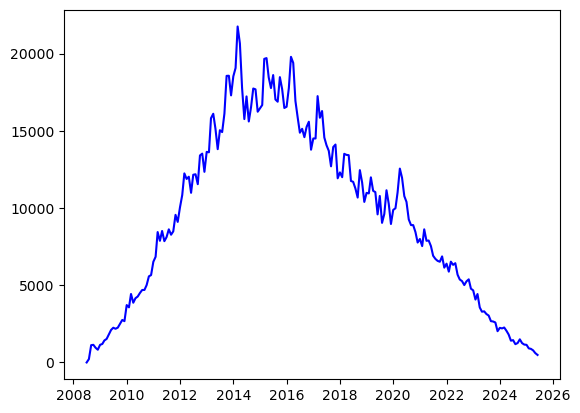

In [106]:
x = reshaped_df.index
y_java = reshaped_df['java']

plt.plot(x, y_java, linestyle='-', color='blue')

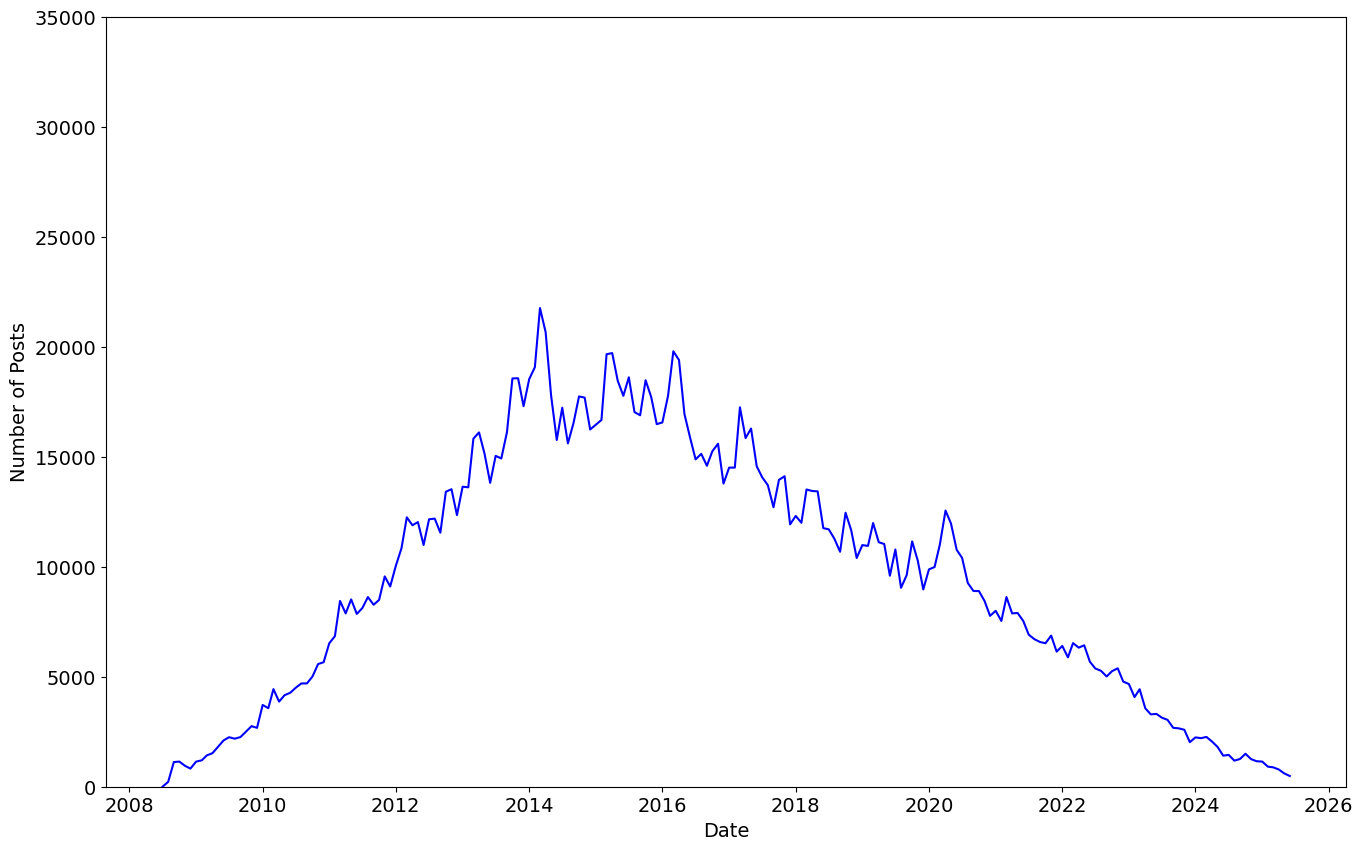

In [107]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(x, y_java, linestyle='-', color='blue')

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

In [108]:
y_python = reshaped_df['python']

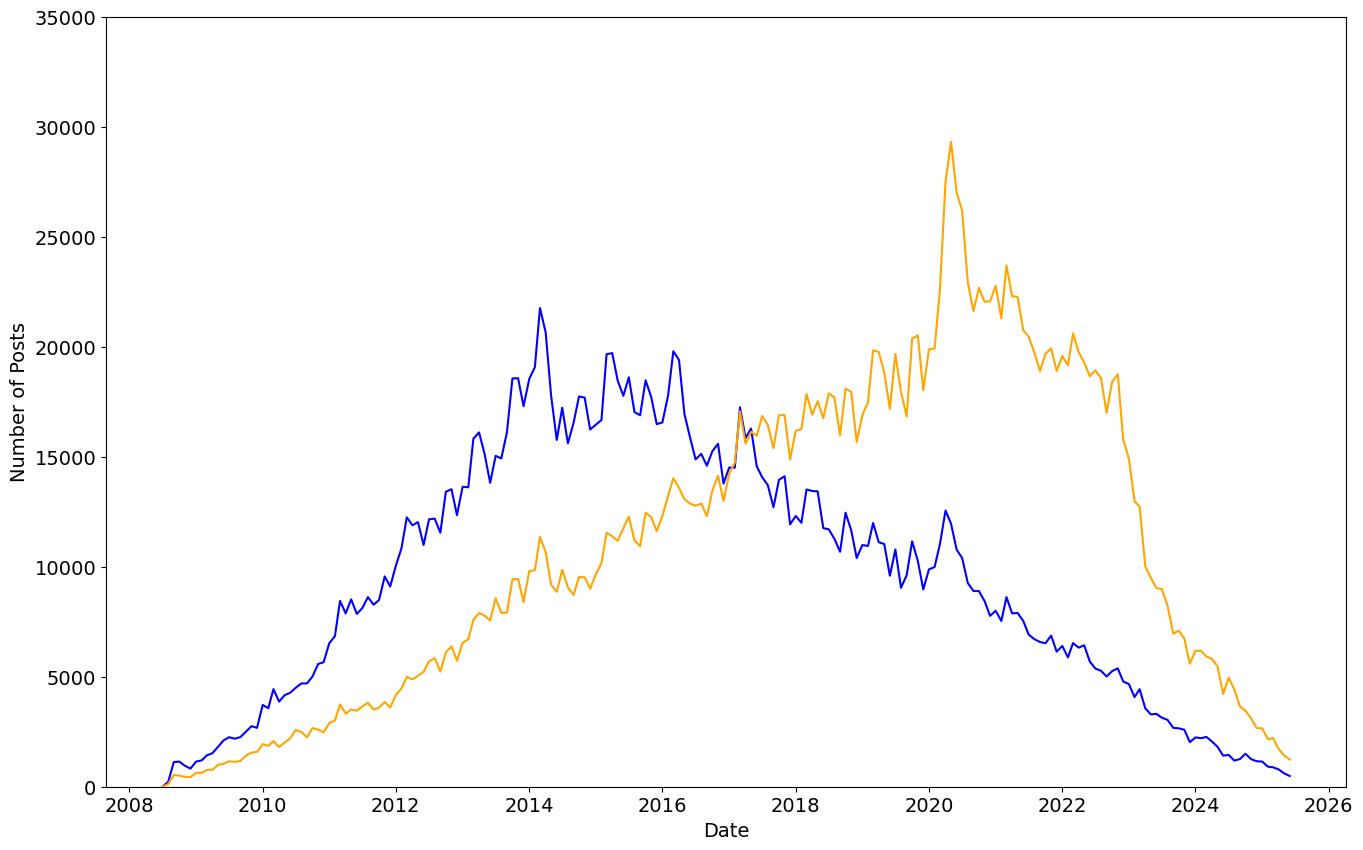

In [109]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(x, y_java, linestyle='-', color='blue')
plt.plot(x, y_python, linestyle='-', color='orange')

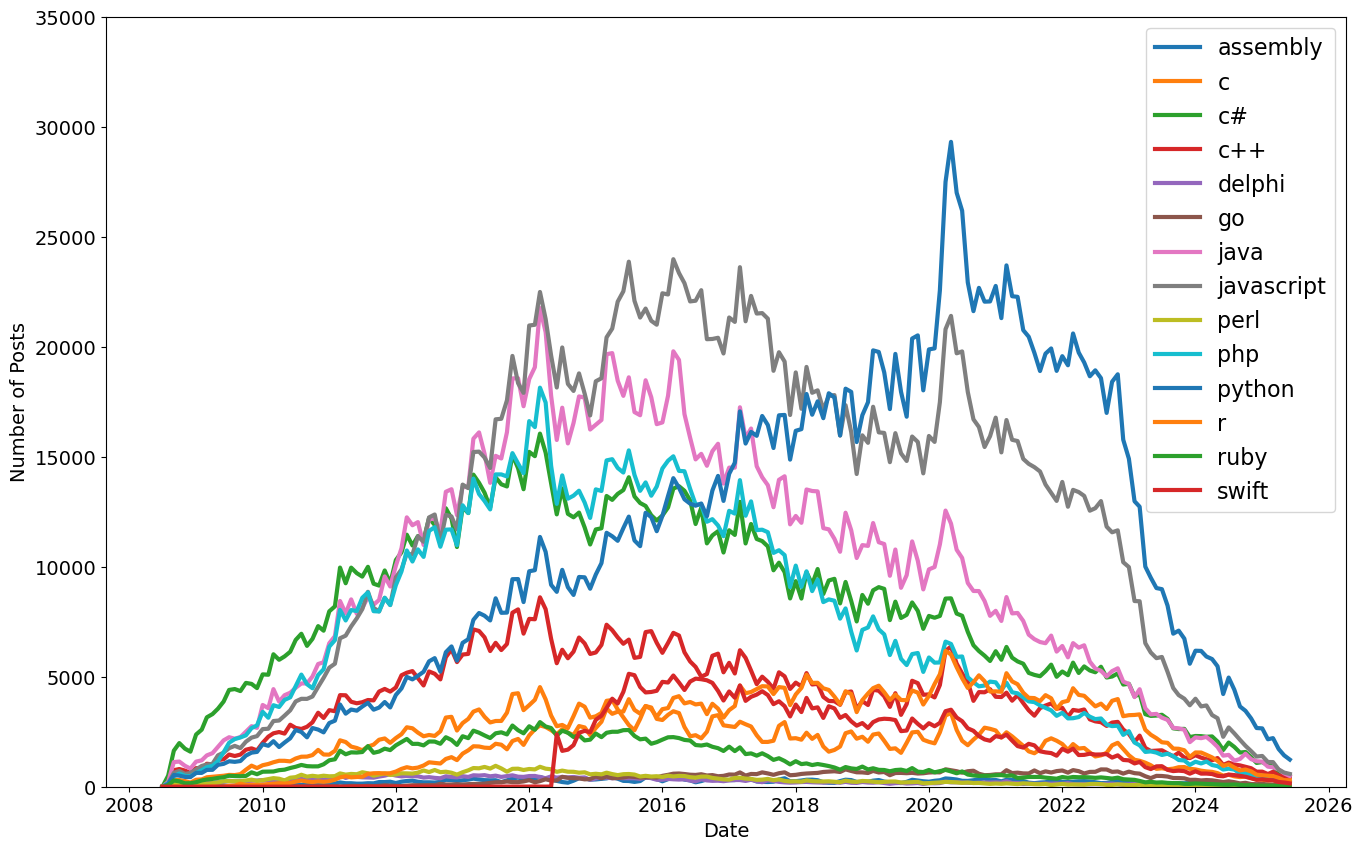

In [110]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(x, y_java, linestyle='-', color='blue')
plt.plot(x, y_python, linestyle='-', color='orange')

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name) # add legend label

plt.legend(fontsize=16) # plot legend

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

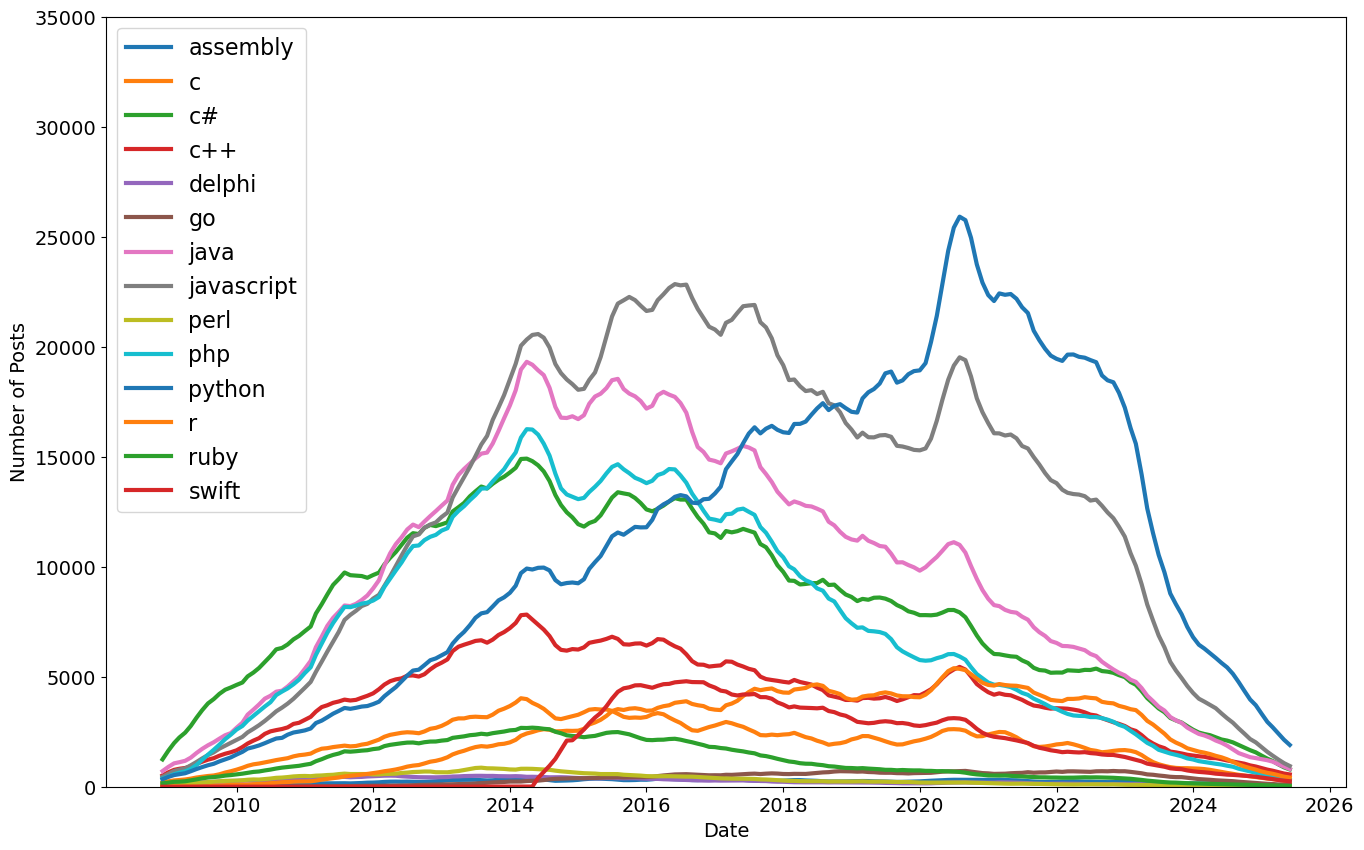

In [111]:
# The window is number of observations that are averaged
# window = 6

roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

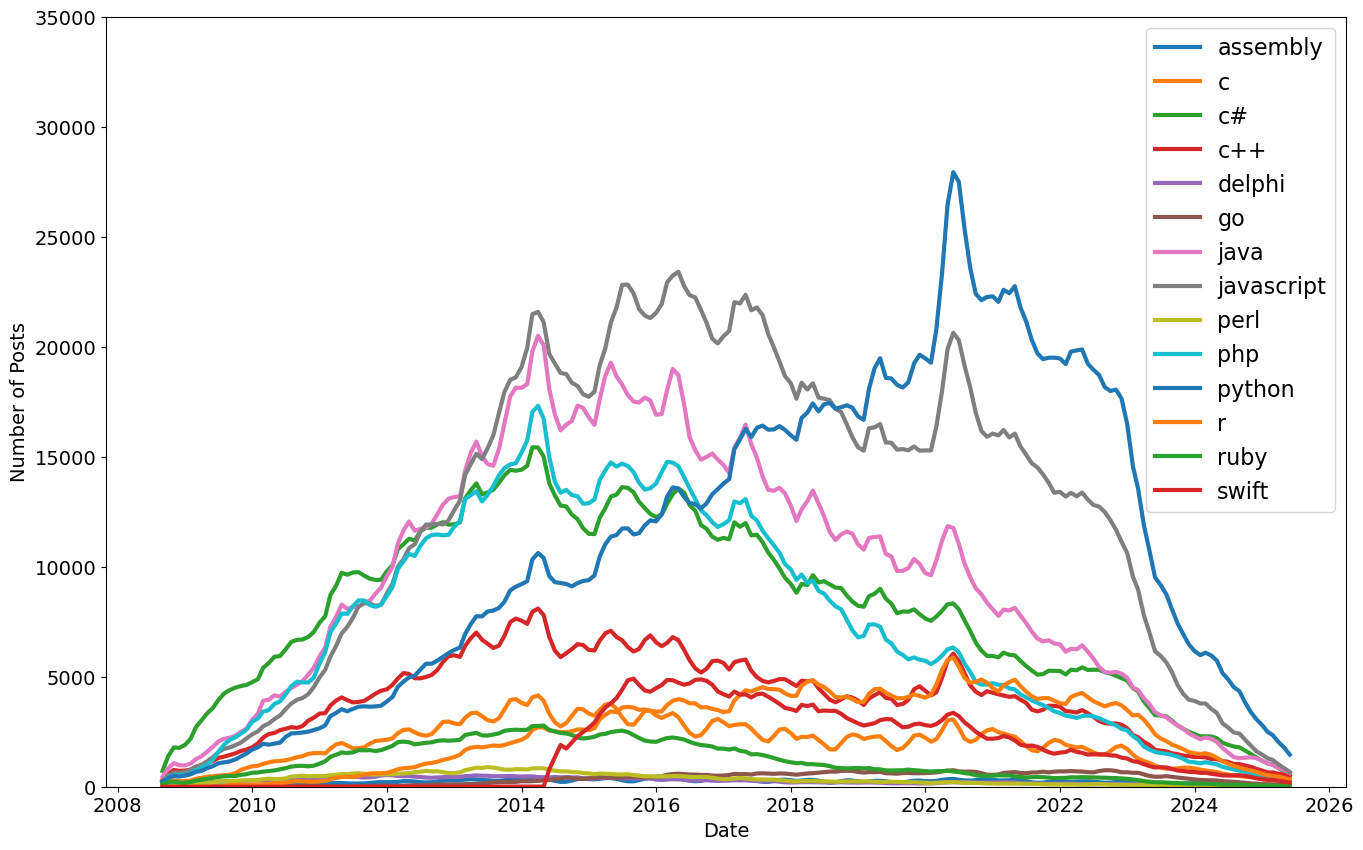

In [112]:
# The window is number of observations that are averaged
# window = 3

roll_df = reshaped_df.rolling(window=3).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

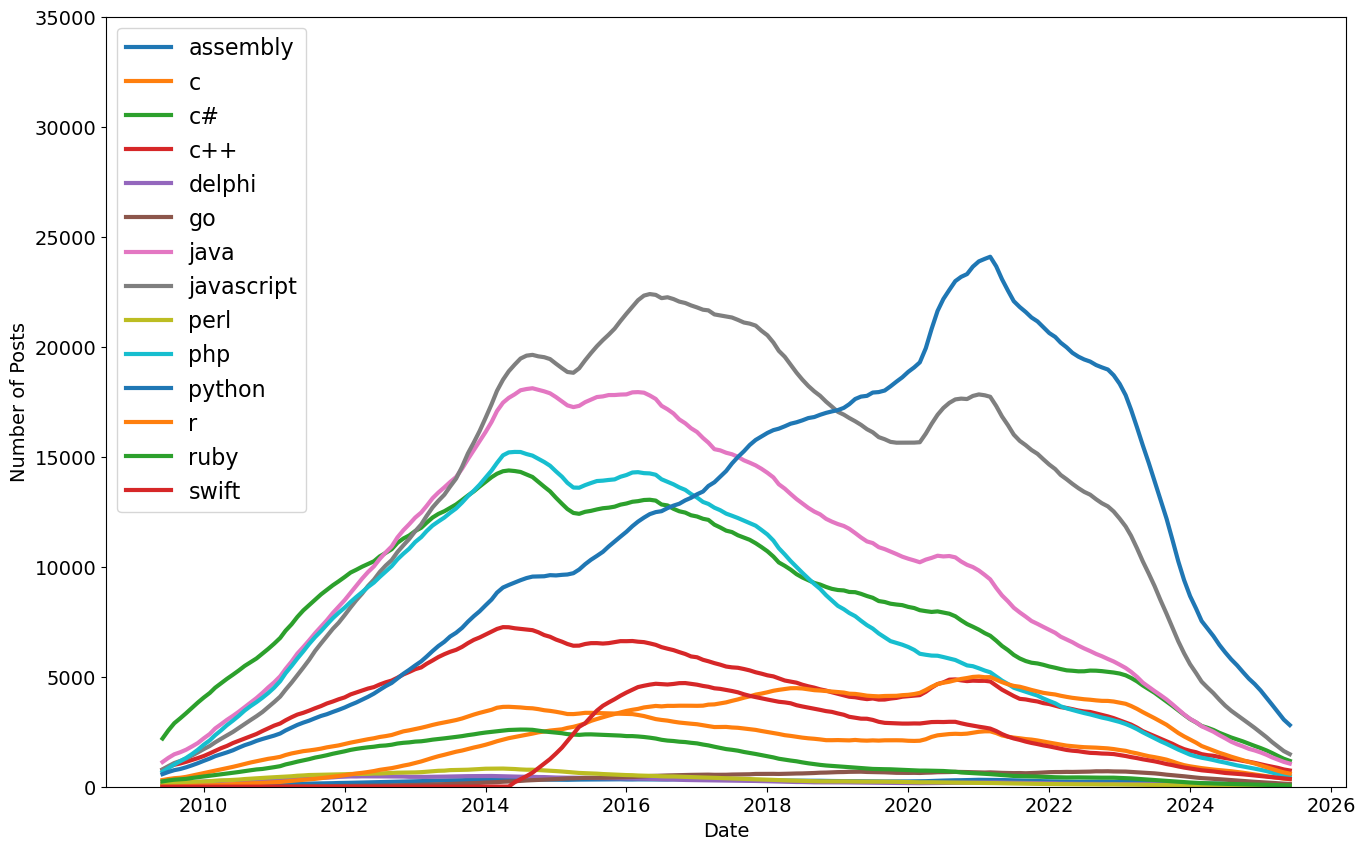

In [113]:
# The window is number of observations that are averaged
# window = 12

roll_df = reshaped_df.rolling(window=12).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)